In [1]:
import yfinance as yf # get financial data
from ta import add_all_ta_features #add technical indicators
from ta.utils import dropna
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import random
%matplotlib inline  

In [2]:
def get_n_predictions(r, previous_points, number_of_neighbors, stock_name, real_points, dates):
    d = r
    half_p_d  = [previous_points[i:i+d] for i in range(0, len(previous_points)-d, d)]
    #print(half_p_d[0])
    points = half_p_d[:-1]
    nbrs = NearestNeighbors(n_neighbors=number_of_neighbors, algorithm='ball_tree').fit(points)
    distances, indices = nbrs.kneighbors([points[-1]])
    #print(indices)
    index = random.choice(indices[0])
    new_p = [half_p_d[-1][i] + half_p_d[index + 1][i] - half_p_d[index][i] for i in range(len(half_p_d[-1]))]

    points = np.append (points, [new_p], axis = 0)
    for n in range(10):
        distances, indices = nbrs.kneighbors([new_p])
        index = random.choice(indices[0])
        new_p = [new_p[i] + half_p_d[index][i] - half_p_d[index - 1][i] for i in range(len(new_p))]
        #print(new_p, half_p_3[indices[0][0]])
        points = np.append(points, [new_p], axis = 0)

    flatten = points.flatten()
    
    plt.plot(dates[:len(flatten)], real_points[:len(flatten)])
    plt.plot(dates[:len(flatten)], flatten)
    plt.legend(["Real Price", "Predicted"])
    plt.title(f'Stock Price Change from {str(dates[0])} to {str(dates[len(flatten) - 1])} for {stock_name} with r={r} and k={number_of_neighbors}')
    plt.show()
    
    #return the half that was predicted
    return flatten[len(previous_points):]

In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def calculate_error(real, predicted):
    
    forecast_errors = [real[i]-predicted[i] for i in range(len(real))]
    mfe = sum(forecast_errors) * 1.0/len(real) #mean_forecast_error
    
    mae = mean_absolute_error(real, predicted) 
    
    mse = mean_squared_error(real, predicted) 
    
    rmse = sqrt(mse) #root_mean_square
    
    return {'MFE': mfe, 'MAE': mae,  'MSE': mse, 'RMSE': rmse}

In [10]:
def add_technical_indicators(hist):
    return add_all_ta_features(hist, open="Open", high="High", low="Low", close="Close", volume="Volume") # Substantiate data with momentum indicators

In [12]:
stock = yf.Ticker('GOOGL')
hist = stock.history(period="max")
a = add_technical_indicators(hist)
a.columns

/Users/nurpeiis/miniconda3/envs/stock_prediction/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/nurpeiis/miniconda3/envs/stock_prediction/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 't

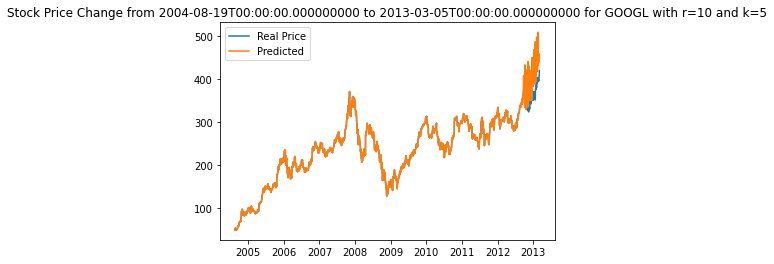

Error: {'MFE': -41.797107118548766, 'MAE': 43.99738812687421, 'MSE': 2662.107179261283, 'RMSE': 51.5956120155705}


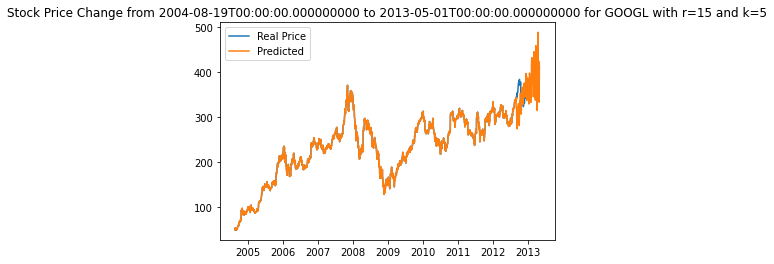

Error: {'MFE': 1.6453716909285072, 'MAE': 25.937230391468077, 'MSE': 1034.6651296927694, 'RMSE': 32.16621099372398}


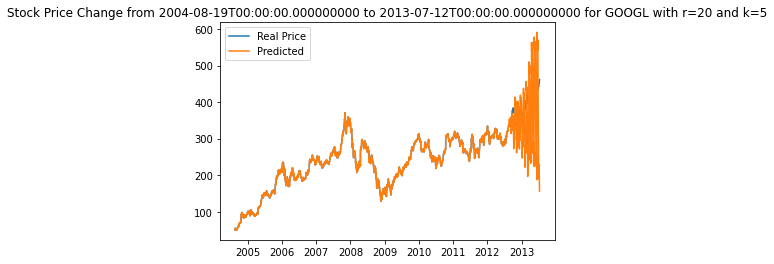

Error: {'MFE': 36.40373125025835, 'MAE': 97.85645709971271, 'MSE': 13702.240825181409, 'RMSE': 117.05657104657307}


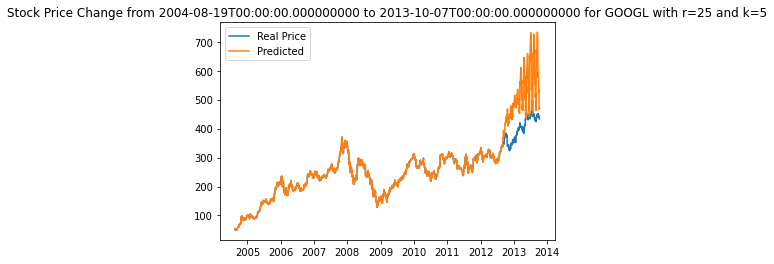

Error: {'MFE': -128.81073243167984, 'MAE': 129.0968015126914, 'MSE': 21259.28395024934, 'RMSE': 145.80563758047677}


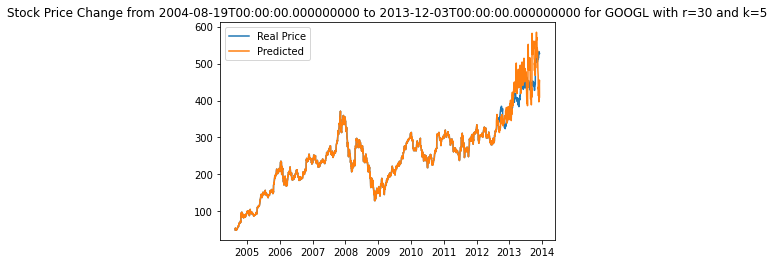

Error: {'MFE': -24.657707663143384, 'MAE': 38.95743758785683, 'MSE': 2460.711431246797, 'RMSE': 49.60555847127212}


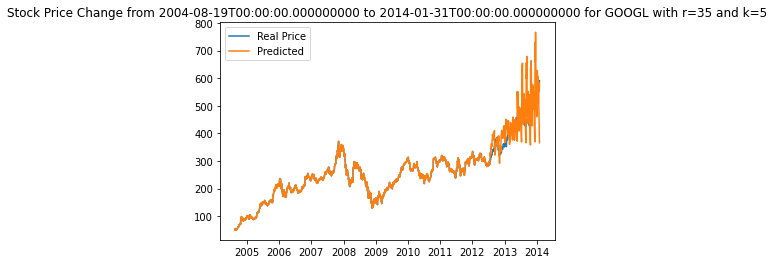

Error: {'MFE': -23.965426181225066, 'MAE': 51.91996964567701, 'MSE': 4973.5288820288715, 'RMSE': 70.52325064848381}


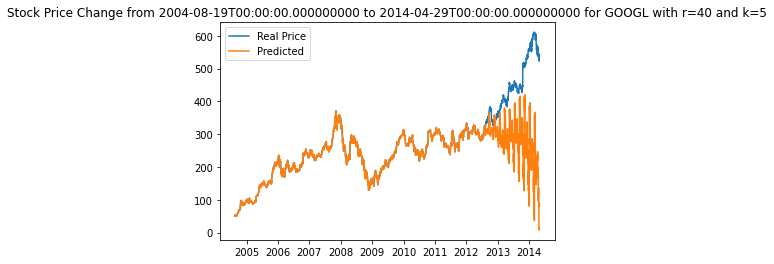

Error: {'MFE': 185.34882066427588, 'MAE': 185.73463016304075, 'MSE': 51339.53526830922, 'RMSE': 226.58229248621618}


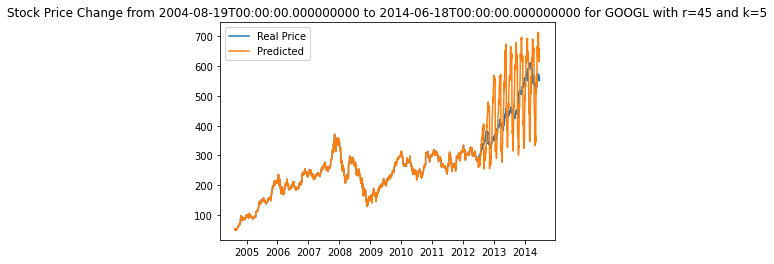

Error: {'MFE': -33.05173589598458, 'MAE': 100.76249597657402, 'MSE': 13838.110229640566, 'RMSE': 117.63549731964653}


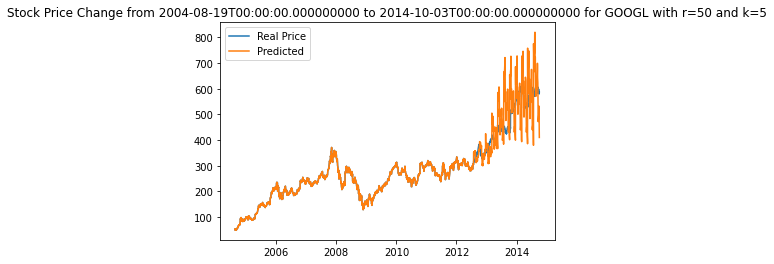

Error: {'MFE': -21.773062910488946, 'MAE': 66.73401374281767, 'MSE': 8037.4986279600525, 'RMSE': 89.6520977331822}


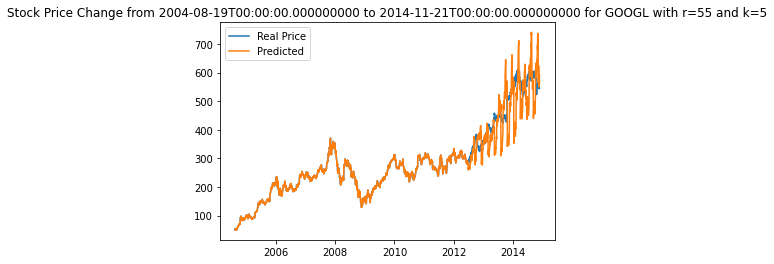

Error: {'MFE': 18.556867906663303, 'MAE': 62.92245997739642, 'MSE': 6343.036951982155, 'RMSE': 79.64318521996816}


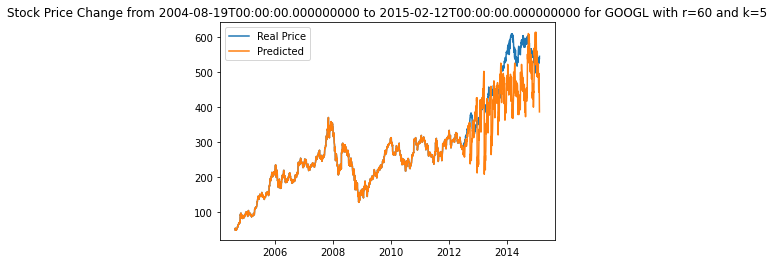

Error: {'MFE': 60.235832823152656, 'MAE': 76.26286569799349, 'MSE': 8710.294804076244, 'RMSE': 93.32896015747869}


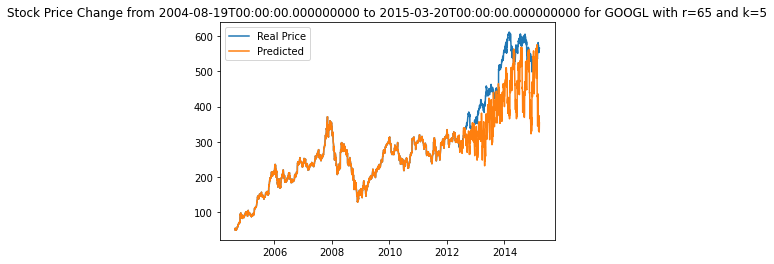

Error: {'MFE': 89.59005911264823, 'MAE': 91.42891884471383, 'MSE': 11765.42074092639, 'RMSE': 108.4685241944703}


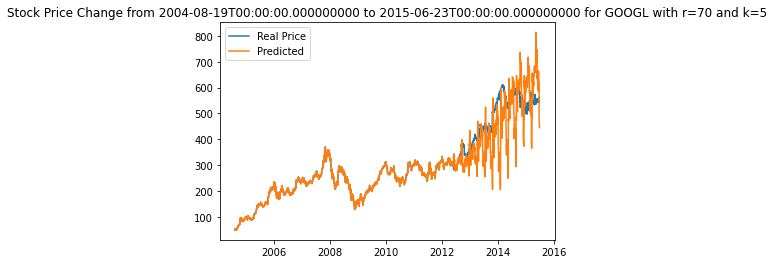

Error: {'MFE': 33.91232239129091, 'MAE': 79.37421600386742, 'MSE': 10531.729118120707, 'RMSE': 102.62421311815602}


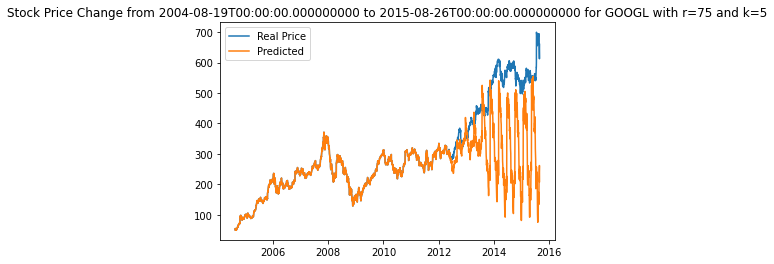

Error: {'MFE': 183.33353150088485, 'MAE': 186.88657282202283, 'MSE': 56115.34353881141, 'RMSE': 236.88677366795176}


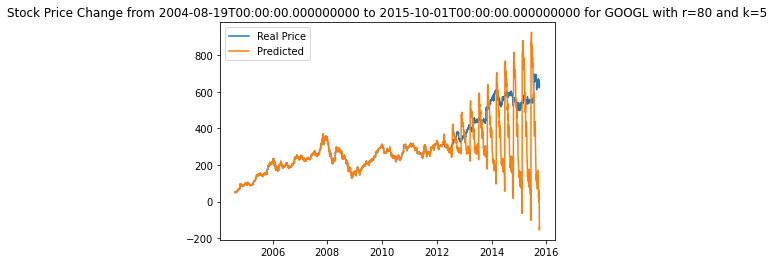

Error: {'MFE': 146.34797570670398, 'MAE': 209.83048999007138, 'MSE': 70109.1510127511, 'RMSE': 264.78132678259453}


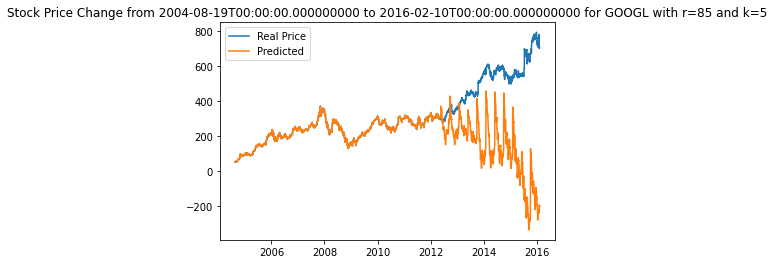

Error: {'MFE': 422.16340530813807, 'MAE': 422.21631878749406, 'MSE': 243150.00045114697, 'RMSE': 493.10242389502304}


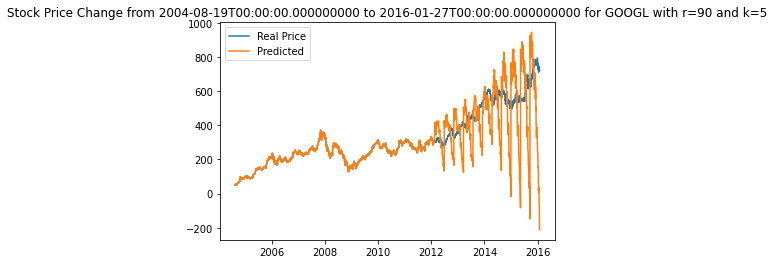

Error: {'MFE': 58.950296086770344, 'MAE': 170.70546625779247, 'MSE': 51497.24829510642, 'RMSE': 226.9300515469611}


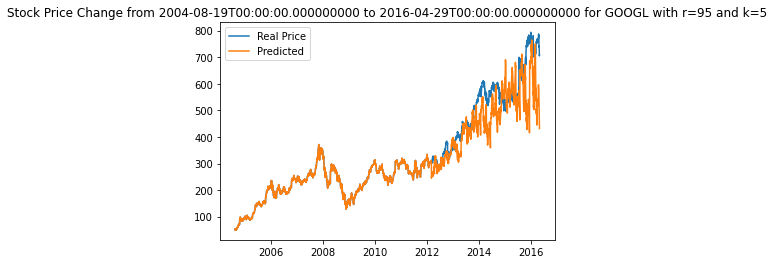

Error: {'MFE': 59.57650874605115, 'MAE': 77.48581036731967, 'MSE': 10913.719872430596, 'RMSE': 104.46875069814224}


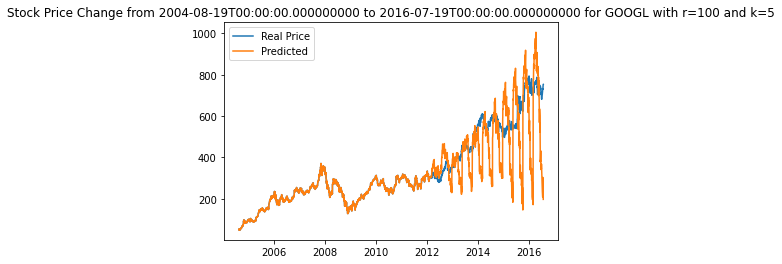

Error: {'MFE': 70.81121655736507, 'MAE': 132.92695503516242, 'MSE': 33044.45157860305, 'RMSE': 181.78132901539436}


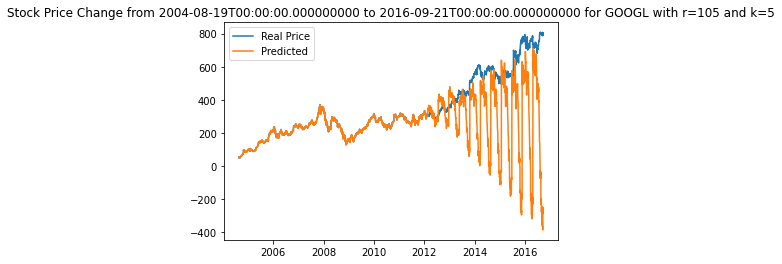

Error: {'MFE': 272.52225850525514, 'MAE': 278.45947313212775, 'MSE': 156884.51057998813, 'RMSE': 396.0864938116271}


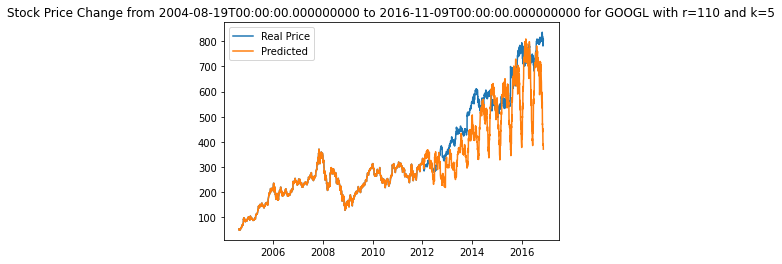

Error: {'MFE': 84.31098275142925, 'MAE': 99.80616862572317, 'MSE': 16272.253945111408, 'RMSE': 127.56274513003947}


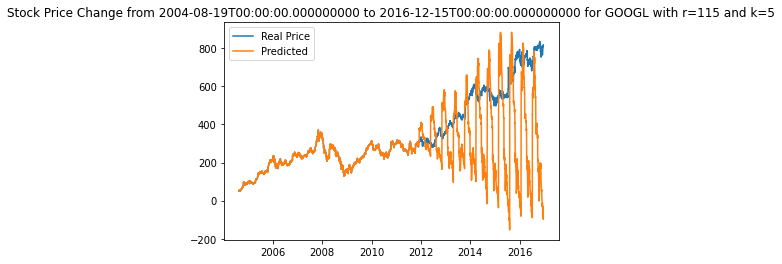

Error: {'MFE': 244.36432872099036, 'MAE': 302.38016358000954, 'MSE': 143776.90902281148, 'RMSE': 379.17925711042193}


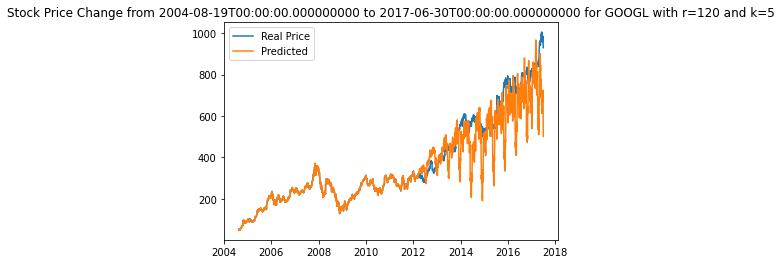

Error: {'MFE': 69.05234421713197, 'MAE': 94.72846837280376, 'MSE': 17120.531192446648, 'RMSE': 130.84544773299012}


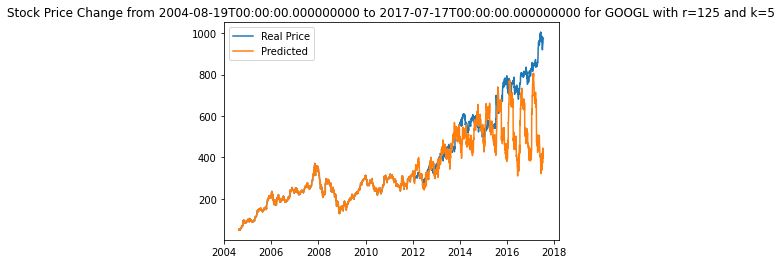

Error: {'MFE': 115.0411920491808, 'MAE': 131.74180732835225, 'MSE': 38436.052756197416, 'RMSE': 196.05114831644678}


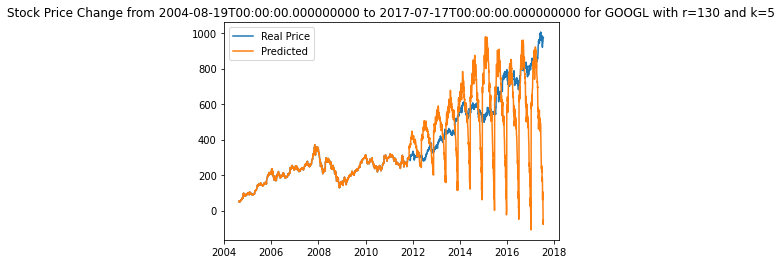

Error: {'MFE': 59.61058760922188, 'MAE': 189.95660749090226, 'MSE': 68747.11755130552, 'RMSE': 262.196715370932}


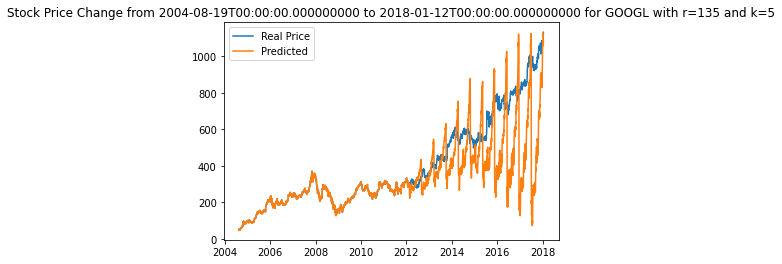

Error: {'MFE': 168.94204353493868, 'MAE': 212.83560605927897, 'MSE': 77342.87750524645, 'RMSE': 278.10587463274925}


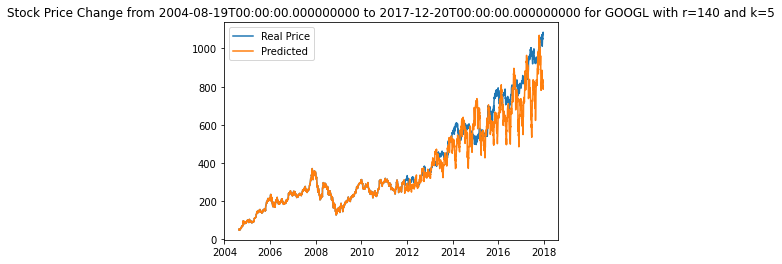

Error: {'MFE': 55.63699670708571, 'MAE': 84.47303368646375, 'MSE': 12491.68573072287, 'RMSE': 111.76621014744514}


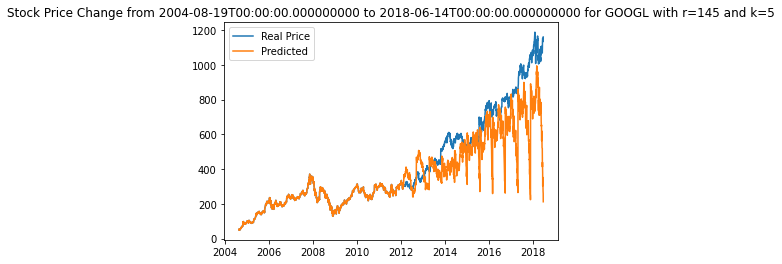

Error: {'MFE': 138.26667575288937, 'MAE': 152.35585776903648, 'MSE': 41933.629516154775, 'RMSE': 204.7770238971032}


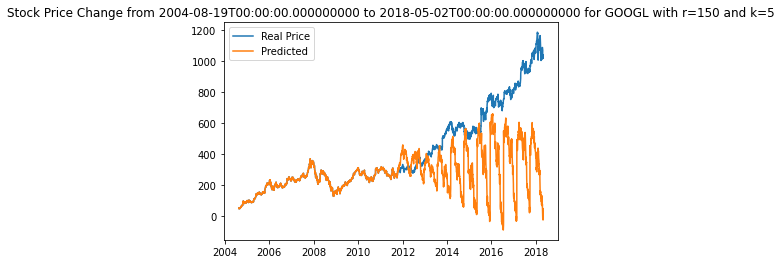

Error: {'MFE': 351.1929738042694, 'MAE': 352.07399222406, 'MSE': 187392.20043483397, 'RMSE': 432.8882077798308}


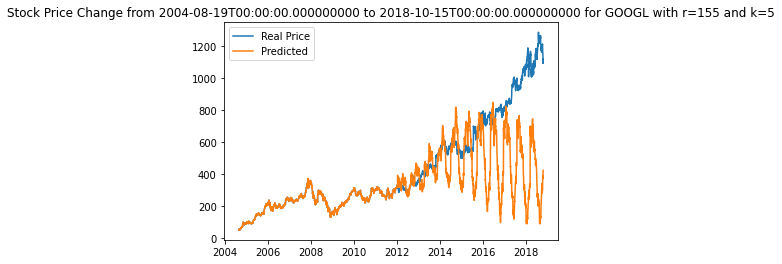

Error: {'MFE': 241.97765943963114, 'MAE': 281.3400417312763, 'MSE': 162367.64811027583, 'RMSE': 402.9486916597147}


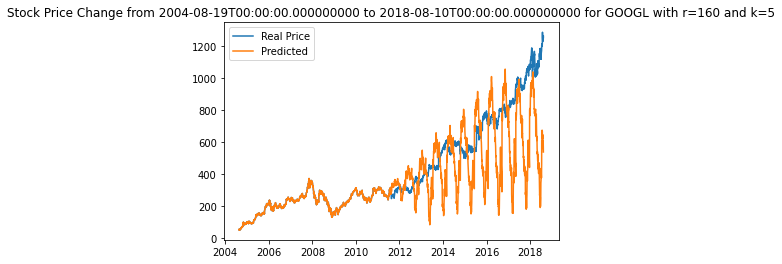

Error: {'MFE': 161.15589834152232, 'MAE': 235.5848333100383, 'MSE': 95703.20649183533, 'RMSE': 309.3593484797822}


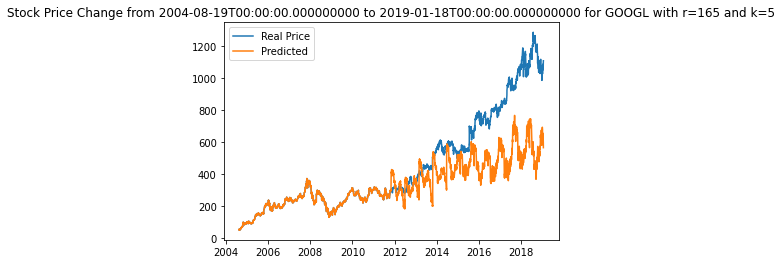

Error: {'MFE': 262.24314219382387, 'MAE': 265.5267211353575, 'MSE': 108945.12414067073, 'RMSE': 330.06836282908233}


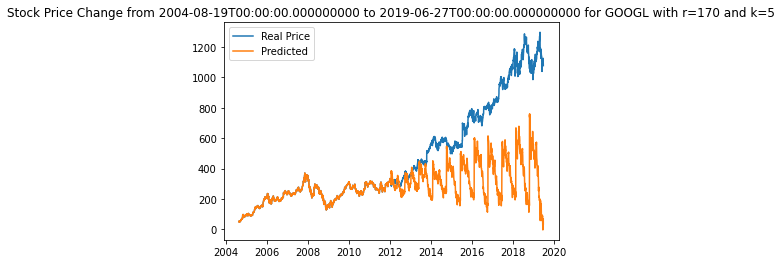

Error: {'MFE': 400.9976843319538, 'MAE': 401.5327548291854, 'MSE': 237363.72684845224, 'RMSE': 487.19988387565553}


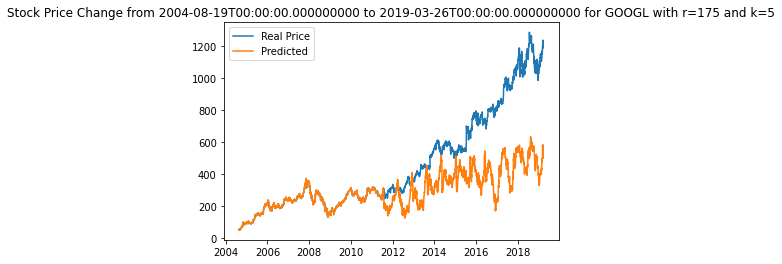

Error: {'MFE': 350.6088078879371, 'MAE': 351.4234902142304, 'MSE': 163923.24593072917, 'RMSE': 404.8743582035409}


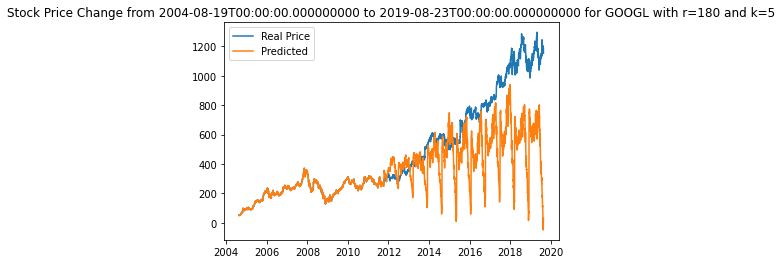

Error: {'MFE': 279.0739453008507, 'MAE': 293.29145955956693, 'MSE': 146083.4330292155, 'RMSE': 382.2086250063118}


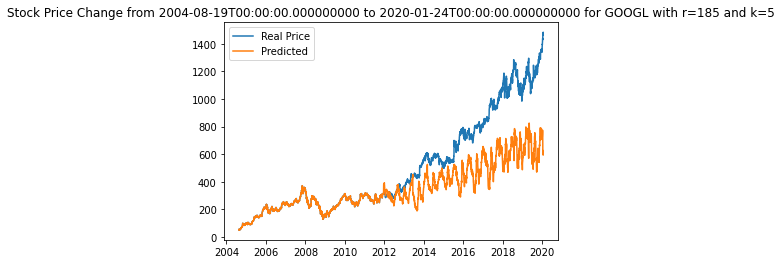

Error: {'MFE': 310.7654526605471, 'MAE': 310.79073421099713, 'MSE': 129406.51054464569, 'RMSE': 359.73116426665854}


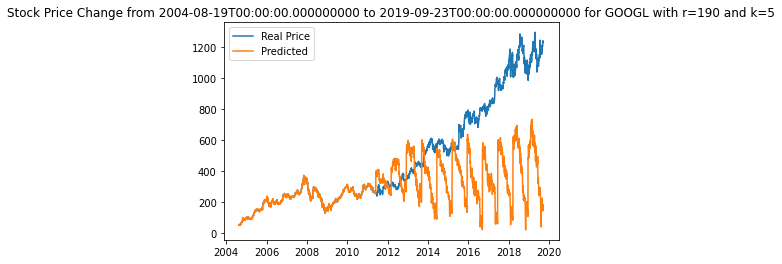

Error: {'MFE': 397.4113416633584, 'MAE': 418.7948739873538, 'MSE': 252070.52709523495, 'RMSE': 502.0662576744577}


In [27]:
stock = yf.Ticker('GOOGL')
hist = stock.history(period="max")
close_p = hist['Close']
half_p = close_p.values[:int(len(close_p.values)/2)]
real = close_p.values[int(len(close_p.values)/2):]
dates = hist.index.to_series().values
for i in range(10, 191, 5):
    predicted = get_n_predictions(i, half_p, 5, 'GOOGL', close_p.values, dates)
    print(f'Error: {calculate_error(real[:len(predicted)], predicted)}')

In [3]:
open_p = hist['Open']
high_p = hist['High']
low_p = hist['Low']
close_p = hist['Close']
dates = hist.index.to_series().values
start_date = dates[0]
end_date = dates[-1]

In [2]:
google = yf.Ticker('GOOGL')
hist = google.history(period="max")
name = 'Google'